# Evaluation Overview

In this notebook, we evaluate the baseline KeyBERT model against three enhanced versions: 
**Reranker**, **Sentiment-aware**, and **Metadata**. Each model is assessed on a set of 15 movies, 
using the metrics defined in the evaluation files.

The analysis covers:
- Average metric comparison tables
- Per-movie performance visualizations
- Clear highlighting of improvements and model consistency

Each section aims to capture both overall performance trends and movie-specific variations, 
providing a comprehensive comparison of the models' effectiveness.


## Reranker Model Evaluation

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Load the evaluation data
df = pd.read_csv("base_vs_reranker_evaluation.csv")

# Filter rows by model type and sort by movie title
df_base = df[df["Model"] == "base"].sort_values(by="Movie").reset_index(drop=True)
df_rerank = df[df["Model"] == "reranker"].sort_values(by="Movie").reset_index(drop=True)

# Create a comparison dataframe with all key metrics, including nDCG@5
df_metrics = pd.DataFrame({
    "Movie": df_base["Movie"],
    "Base Weighted Precision": df_base["Weighted Precision"],
    "Reranker Weighted Precision": df_rerank["Weighted Precision"],
    "Base Weighted Recall": df_base["Weighted Recall"],
    "Reranker Weighted Recall": df_rerank["Weighted Recall"],
    "Base Weighted F1": df_base["Weighted F1-score"],
    "Reranker Weighted F1": df_rerank["Weighted F1-score"],
    "Base nDCG@5": df_base["nDCG@5"],
    "Reranker nDCG@5": df_rerank["nDCG@5"]
})


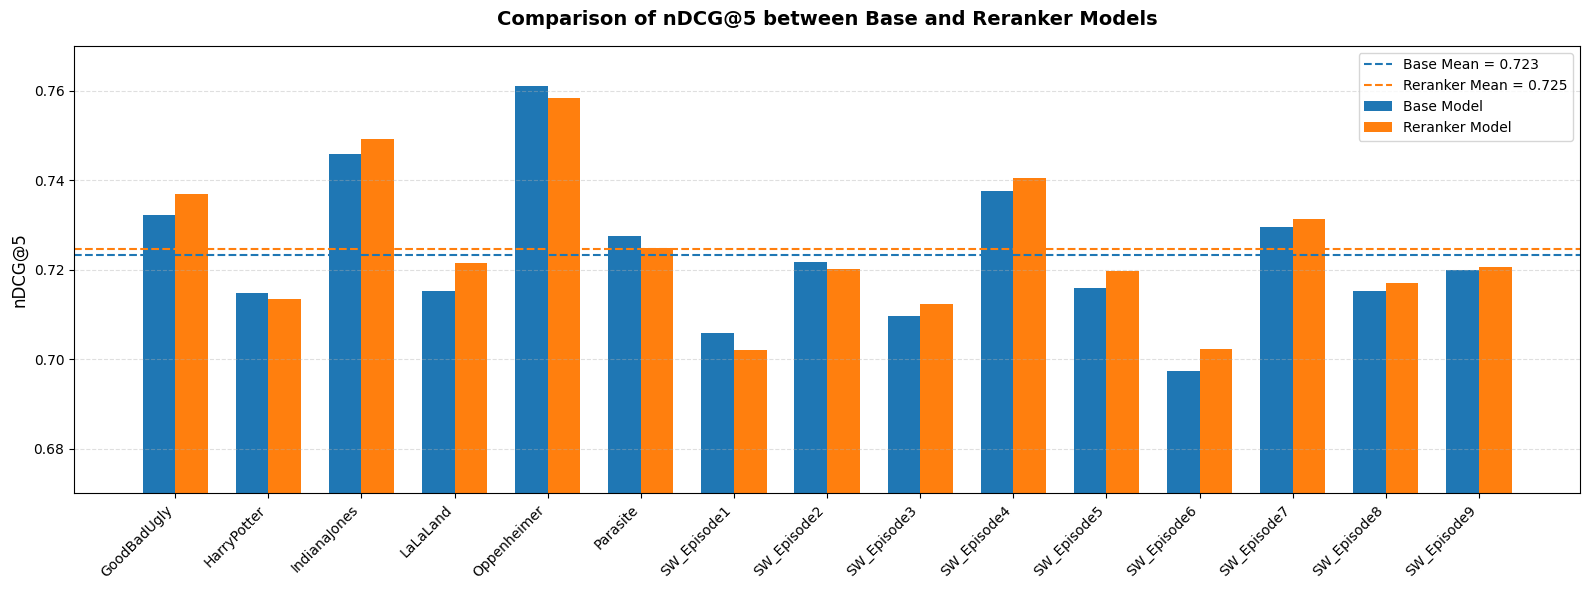

In [ ]:
# Extract movie titles and nDCG@5 values
movies = df_metrics["Movie"]
base_ndcg = df_metrics["Base nDCG@5"]
reranker_ndcg = df_metrics["Reranker nDCG@5"]

# Set bar positions
x = np.arange(len(movies))
width = 0.35

# Define colors
base_color = "#1f77b4"
rerank_color = "#ff7f0e"

# Calculate means
mean_base = base_ndcg.mean()
mean_reranker = reranker_ndcg.mean()

# Create the figure
plt.figure(figsize=(16, 6))
bars1 = plt.bar(x - width/2, base_ndcg, width, label='Base Model', color=base_color)
bars2 = plt.bar(x + width/2, reranker_ndcg, width, label='Reranker Model', color=rerank_color)

# Add average lines
plt.axhline(mean_base, color=base_color, linestyle="--", linewidth=1.5, label=f"Base Mean = {mean_base:.3f}")
plt.axhline(mean_reranker, color=rerank_color, linestyle="--", linewidth=1.5, label=f"Reranker Mean = {mean_reranker:.3f}")

# Customize axes and title
plt.ylabel("nDCG@5", fontsize=12)
plt.title("Comparison of nDCG@5 between Base and Reranker Models", fontsize=14, pad=15, fontweight='bold')
plt.xticks(x, movies, rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0.67, 0.77)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.legend(fontsize=10)
plt.tight_layout()

#plt.savefig("reranker_ndcg_plot.png", dpi=500, bbox_inches="tight")

# Show the plot
plt.show()

In [ ]:
# Prepare a list of summary statistics
summary_data = []

# Define the metrics to include
metrics = ["Weighted Precision", "Weighted Recall", "Weighted F1", "nDCG@5"]
for metric in metrics:
    base_col = f"Base {metric}"
    rerank_col = f"Reranker {metric}"
    
    base_values = df_metrics[base_col]
    reranker_values = df_metrics[rerank_col]
    
    base_mean = base_values.mean()
    reranker_mean = reranker_values.mean()
    delta_mean = reranker_mean - base_mean
    
    base_std = base_values.std()
    reranker_std = reranker_values.std()
    
    summary_data.append({
        "Metric": metric,
        "Base Mean": f"{base_mean:.3f}",
        "Reranker Mean": f"{reranker_mean:.3f}",
        "Δ Mean": f"{delta_mean:+.3f}",
        "Base Std": f"{base_std:.3f}",
        "Reranker Std": f"{reranker_std:.3f}"
    })

# Create the summary dataframe
df_summary = pd.DataFrame(summary_data)

# Display the table
from IPython.display import display
display(df_summary)


,Metric,Base Mean,Reranker Mean,Base Std,Reranker Std
0,Weighted Precision,0.920,0.926,0.012,0.011
1,Weighted Recall,0.475,0.474,0.015,0.015
2,Weighted F1,0.627,0.627,0.013,0.013
3,nDCG@5,0.723,0.725,0.016,0.016


## Sentiment Model Evaluation

In [26]:
# Load the evaluation data
df = pd.read_csv("base_vs_sentiment_evaluation.csv")

# Filter rows for "base" and "sentiment" models and sort by movie title
df_base = df[df["Model"] == "base"].sort_values(by="Movie").reset_index(drop=True)
df_sent = df[df["Model"] == "sentiment"].sort_values(by="Movie").reset_index(drop=True)

# Create a comparison dataframe with all key metrics, including sentiment analysis
df_sentiment = pd.DataFrame({
    "Movie": df_base["Movie"],

    # Standard metrics
    "Base Precision": df_base["Precision"],
    "Sentiment Precision": df_sent["Precision"],
    "Base Recall": df_base["Recall"],
    "Sentiment Recall": df_sent["Recall"],
    "Base F1": df_base["F1-score"],
    "Sentiment F1": df_sent["F1-score"],

    # Weighted metrics
    "Base Weighted Precision": df_base["Weighted Precision"],
    "Sentiment Weighted Precision": df_sent["Weighted Precision"],
    "Base Weighted Recall": df_base["Weighted Recall"],
    "Sentiment Weighted Recall": df_sent["Weighted Recall"],
    "Base Weighted F1": df_base["Weighted F1-score"],
    "Sentiment Weighted F1": df_sent["Weighted F1-score"],

    # Semantic metrics
    "Base Semantic Precision": df_base["Semantic Precision"],
    "Sentiment Semantic Precision": df_sent["Semantic Precision"],
    "Base Semantic Recall": df_base["Semantic Recall"],
    "Sentiment Semantic Recall": df_sent["Semantic Recall"],
    "Base Semantic F1": df_base["Semantic F1-score"],
    "Sentiment Semantic F1": df_sent["Semantic F1-score"],

    # SAS
    "Base SAS Keywords": df_base["SAS from Keywords"],
    "Sentiment SAS Keywords": df_sent["SAS from Keywords"],
    "Base SAS Text": df_base["SAS from text"],
    "Sentiment SAS Text": df_sent["SAS from text"]
})

In [35]:
# Lista completa delle metriche disponibili
all_metric_pairs = [
    ("Precision", "Base Precision", "Sentiment Precision"),
    ("Recall", "Base Recall", "Sentiment Recall"),
    ("F1", "Base F1", "Sentiment F1"),
    ("Weighted Precision", "Base Weighted Precision", "Sentiment Weighted Precision"),
    ("Weighted Recall", "Base Weighted Recall", "Sentiment Weighted Recall"),
    ("Weighted F1", "Base Weighted F1", "Sentiment Weighted F1"),
    ("Semantic Precision", "Base Semantic Precision", "Sentiment Semantic Precision"),
    ("Semantic Recall", "Base Semantic Recall", "Sentiment Semantic Recall"),
    ("Semantic F1", "Base Semantic F1", "Sentiment Semantic F1"),
    ("SAS Keywords", "Base SAS Keywords", "Sentiment SAS Keywords"),
    ("SAS Text", "Base SAS Text", "Sentiment SAS Text")
]

# Calcola la media e il delta per ciascuna metrica
rows = []
for name, base_col, sent_col in all_metric_pairs:
    base_mean = df_sentiment[base_col].mean()
    sent_mean = df_sentiment[sent_col].mean()
    delta = sent_mean - base_mean
    rows.append([name, base_mean, sent_mean, delta])

# Crea il DataFrame riassuntivo
df_all_metrics_summary = pd.DataFrame(rows, columns=["Metric", "Base", "Sentiment", "Delta"])
df_all_metrics_summary.set_index("Metric", inplace=True)

df_all_metrics_summary

,Base,Sentiment,Delta
Metric,,,
Precision,0.911363,0.886826,-0.024536
Recall,0.353570,0.334648,-0.018922
F1,0.509198,0.485675,-0.023523
Weighted Precision,0.919964,0.897515,-0.022450
Weighted Recall,0.475392,0.445332,-0.030059
Weighted F1,0.626689,0.595151,-0.031537
Semantic Precision,0.934097,0.900587,-0.033510
Semantic Recall,0.821617,0.855875,0.034259
Semantic F1,0.873064,0.875570,0.002507


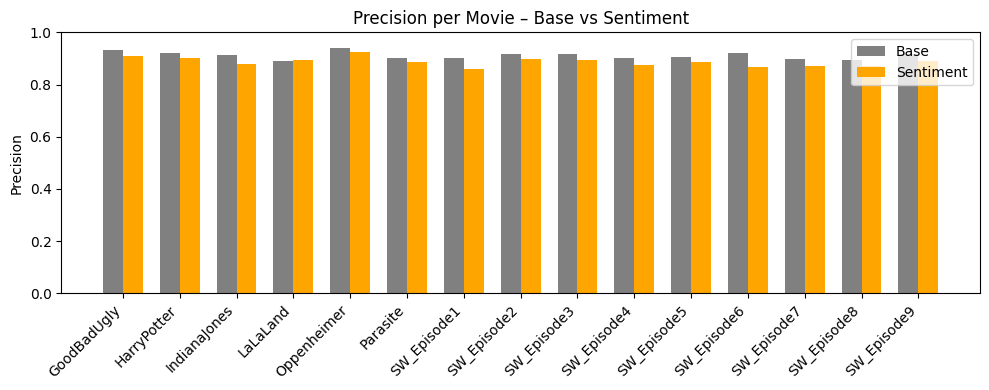

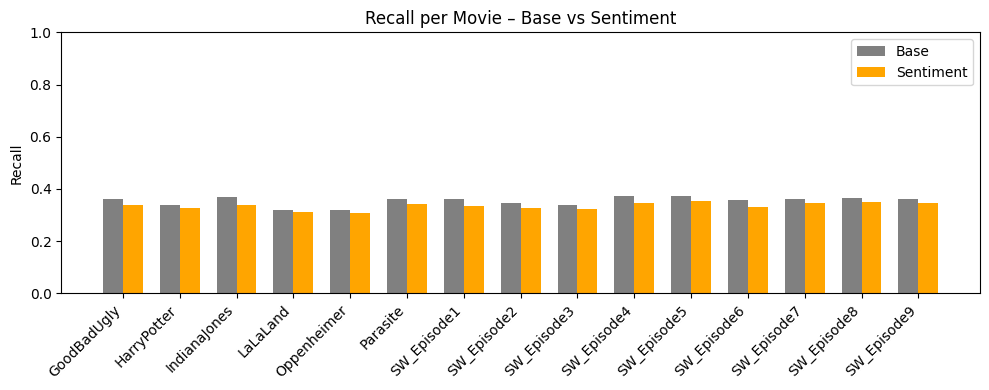

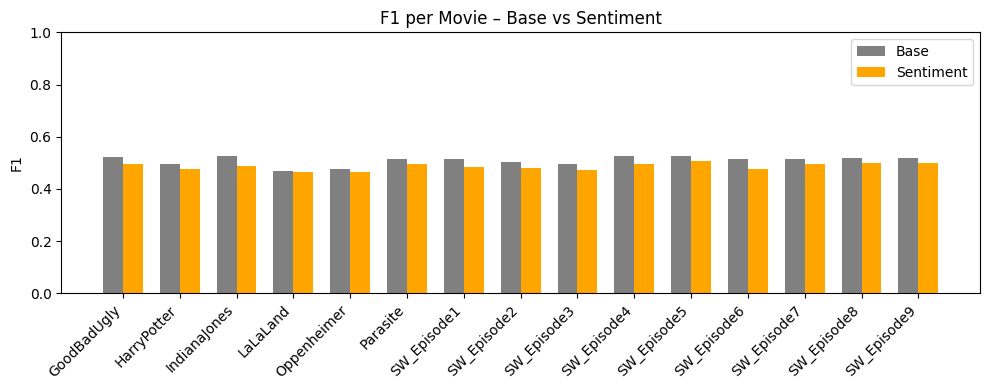

In [ ]:
# 1. Unweighted – Barplot per film: Base vs Sentiment (Precision, Recall, F1)
import matplotlib.pyplot as plt
import numpy as np

metrics = ["Precision", "Recall", "F1-score"]
titles = ["Precision", "Recall", "F1"]

for metric, title in zip(metrics, titles):
    x = df_sentiment["Movie"]
    x_axis = np.arange(len(x))
    width = 0.35

    plt.figure(figsize=(10, 4))
    plt.bar(x_axis - width/2, df_sentiment[f"Base {title}"], width=width, label="Base", color="gray")
    plt.bar(x_axis + width/2, df_sentiment[f"Sentiment {title}"], width=width, label="Sentiment", color="orange")

    plt.xticks(ticks=x_axis, labels=x, rotation=45, ha='right')
    plt.ylabel(title)
    plt.title(f"{title} per Movie – Base vs Sentiment")
    plt.ylim(0, 1)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [33]:
# 📌 2. Weighted – Tabella con medie e delta
weighted_metrics = ["Weighted Precision", "Weighted Recall", "Weighted F1"]
df_weighted_summary = df_all_metrics_summary.loc[weighted_metrics]
df_weighted_summary


,Base,Sentiment,Delta
Metric,,,
Weighted Precision,0.919964,0.897515,-0.022450
Weighted Recall,0.475392,0.445332,-0.030059
Weighted F1,0.626689,0.595151,-0.031537


In [46]:
# 📌 3. Semantic – Compute mean, variance, and standard deviation for each metric (transposed)
semantic_metrics = [
    "Base Semantic Precision", "Sentiment Semantic Precision",
    "Base Semantic Recall", "Sentiment Semantic Recall",
    "Base Semantic F1", "Sentiment Semantic F1"
]

semantic_stats = {
    "Mean": df_sentiment[semantic_metrics].mean(),
    "Variance": df_sentiment[semantic_metrics].var(),
    "Std Dev": df_sentiment[semantic_metrics].std()
}

df_semantic_stats = pd.DataFrame(semantic_stats).T.round(4).T
df_semantic_stats


,Mean,Variance,Std Dev
Base Semantic Precision,0.9341,0.0021,0.0456
Sentiment Semantic Precision,0.9006,0.0063,0.0795
Base Semantic Recall,0.8216,0.0029,0.0539
Sentiment Semantic Recall,0.8559,0.0036,0.0598
Base Semantic F1,0.8731,0.0015,0.0391
Sentiment Semantic F1,0.8756,0.0031,0.0553


/var/folders/3k/39cgj5q54l52b9t9s6kj73kr0000gn/T/ipykernel_13131/82952037.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


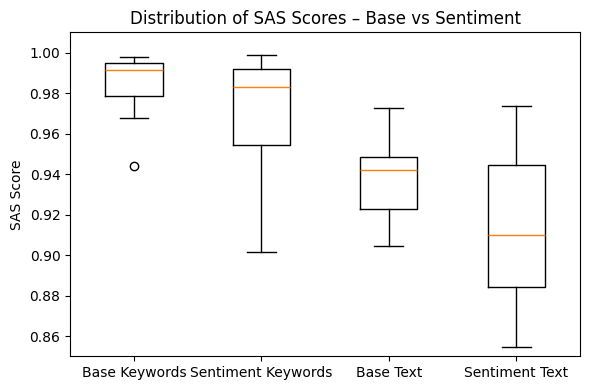

In [ ]:
# 📌 4c. SAS Distribution – Boxplot for SAS (Keywords and Text)
plt.figure(figsize=(6, 4))
plt.boxplot([
    df_sentiment["Base SAS Keywords"], df_sentiment["Sentiment SAS Keywords"],
    df_sentiment["Base SAS Text"], df_sentiment["Sentiment SAS Text"]
],
labels=["Base Keywords", "Sentiment Keywords", "Base Text", "Sentiment Text"])

plt.ylabel("SAS Score")
plt.title("Distribution of SAS Scores - Base vs Sentiment")
plt.ylim(0.85, 1.01)
plt.tight_layout()
plt.show()
